In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
import nltk

In [2]:
# Load files 2018,2019,2020 and 2021
da18 = pd.read_excel('2018.xlsx')
da19 = pd.read_excel('2019.xlsx')
da20 = pd.read_excel('2020.xlsx')
da21 = pd.read_excel('2021.xlsx')

In [3]:
# Format date type
da18['End Date'] = pd.to_datetime(da18['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da19['End Date'] = pd.to_datetime(da19['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da20['End Date'] = pd.to_datetime(da20['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)
da21['End Date'] = pd.to_datetime(da21['End Date'], format='%d-%m-%Y %H:%M:%S', infer_datetime_format=True)

In [4]:
# Rename conductor feedback
da18.rename(columns = {'Are there any other comments you would like to make about the value of the Choir to you?':'conductorfeedback'},inplace = True)
da19.rename(columns = {'3.Is there anything that you particularly like about the choir?':'conductorfeedback'},inplace = True)
da20.rename(columns = {'Do you have any feedback for us about our live sessions?':'conductorfeedback'},inplace = True)
da21.rename(columns = {'9. What is the best thing about the choir? ___________':'conductorfeedback'},inplace = True)

In [5]:
da21_clean = da21['conductorfeedback'].dropna()

In [6]:
da21_clean = da21_clean.reset_index()
da21_clean = da21_clean.drop(columns=['index'])

In [7]:
# 4.Topic modelling
from nltk.stem import PorterStemmer
import re

In [8]:
#Data Cleaning by removing punctuations, numbers, special characters, and short words
documents = da21_clean['conductorfeedback']
Cleaned_doc = []
for r in range(len(documents)):
    tweet = documents[r]
    try:
        tweet = re.sub('[^A-Za-z]', ' ', tweet) #removing everything except alphabets
        tweet = tweet.lower() #lowercase
        Tokens = tweet.split() #tokenization
        Filtered_token = [w for w in Tokens if len(w)>3] # removing short words
        tweet = ' '.join(Filtered_token) 
    except:
        continue
#Save cleaned text
    Cleaned_doc.append(tweet) 
    print('-[Tweet Text]: ', tweet)

-[Tweet Text]:  fact that inclusive accessible everyone
-[Tweet Text]:  appreciate conductor
-[Tweet Text]:  singers
-[Tweet Text]:  singing interactions
-[Tweet Text]:  everyone welcome enjoys participating there pressure music skill theory level explained always most enjoyable
-[Tweet Text]:  people choir
-[Tweet Text]:  singing meeting people
-[Tweet Text]:  excellent leaders singing with others like sing choice songs
-[Tweet Text]:  choir leader dillion
-[Tweet Text]:  
-[Tweet Text]:  singing also being accompanied talented musician singer really makes feel happier
-[Tweet Text]:  choir makes feel happy about yourself that know your giving back community
-[Tweet Text]:  connection others
-[Tweet Text]:  social connection
-[Tweet Text]:  sing songs know learning songs
-[Tweet Text]:  being able sing songs together with everyone
-[Tweet Text]:  chance learn vocal skills with harmonies social connections with others
-[Tweet Text]:  getting house
-[Tweet Text]:  conductor
-[Tweet Text

In [9]:
#Remove the stop-words from the text data
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words = ['https','because','please','very','thank','call','watch','look','today','something','someone',
 'anyone','anything','everyone','everything','thanks','care','thing','doesn','things']
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
            each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item) 
    print('-[Cleaned Text]: ', Cleaned_doc[r])

-[Cleaned Text]:  fact that inclusive accessible
-[Cleaned Text]:  appreciate conductor
-[Cleaned Text]:  singers
-[Cleaned Text]:  singing interactions
-[Cleaned Text]:  welcome enjoys participating there pressure music skill theory level explained always most enjoyable
-[Cleaned Text]:  people choir
-[Cleaned Text]:  singing meeting people
-[Cleaned Text]:  excellent leaders singing with others like sing choice songs
-[Cleaned Text]:  choir leader dillion
-[Cleaned Text]:  
-[Cleaned Text]:  singing also being accompanied talented musician singer really makes feel happier
-[Cleaned Text]:  choir makes feel happy about yourself that know your giving back community
-[Cleaned Text]:  connection others
-[Cleaned Text]:  social connection
-[Cleaned Text]:  sing songs know learning songs
-[Cleaned Text]:  being able sing songs together with
-[Cleaned Text]:  chance learn vocal skills with harmonies social connections with others
-[Cleaned Text]:  getting house
-[Cleaned Text]:  conductor
-

In [10]:
#Select only nouns
Cleaned_doc_noun = Cleaned_doc
for r in range(len(Cleaned_doc_noun)):
    lines = Cleaned_doc[r]
# function to test if something is a noun
    is_noun = lambda pos: pos[:2] == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'
 # do the nlp stuff
    tokenized = nltk.word_tokenize(lines)
    nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    Cleaned_doc_noun[r] = ' '.join(nouns) 
    print('-[Cleaned Text Noun]: ', Cleaned_doc_noun[r])

-[Cleaned Text Noun]:  fact
-[Cleaned Text Noun]:  appreciate conductor
-[Cleaned Text Noun]:  singers
-[Cleaned Text Noun]:  interactions
-[Cleaned Text Noun]:  pressure music skill level
-[Cleaned Text Noun]:  people
-[Cleaned Text Noun]:  meeting people
-[Cleaned Text Noun]:  leaders others choice songs
-[Cleaned Text Noun]:  leader dillion
-[Cleaned Text Noun]:  
-[Cleaned Text Noun]:  singing singer feel happier
-[Cleaned Text Noun]:  choir community
-[Cleaned Text Noun]:  connection others
-[Cleaned Text Noun]:  connection
-[Cleaned Text Noun]:  songs songs
-[Cleaned Text Noun]:  sing songs
-[Cleaned Text Noun]:  chance skills harmonies connections others
-[Cleaned Text Noun]:  house
-[Cleaned Text Noun]:  conductor
-[Cleaned Text Noun]:  friendships choir conductor
-[Cleaned Text Noun]:  people
-[Cleaned Text Noun]:  group
-[Cleaned Text Noun]:  meeting people
-[Cleaned Text Noun]:  feel
-[Cleaned Text Noun]:  conductor husband
-[Cleaned Text Noun]:  community
-[Cleaned Text Nou

In [11]:
# 4.2 Term document matrix

In [12]:
#Fit and transform the processed titles
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer() 
count_data = count_vectorizer.fit_transform(Cleaned_doc_noun)
count_data

<146x131 sparse matrix of type '<class 'numpy.int64'>'
	with 290 stored elements in Compressed Sparse Row format>

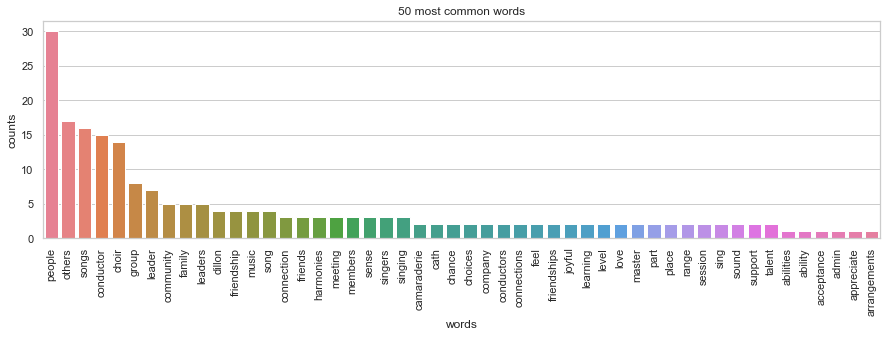

In [13]:
#Visualise most common words
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)

terms = count_vectorizer.get_feature_names()
# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]
count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:50] #Take the top 50 words
 
words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))
 
plt.figure(2, figsize=(15, 4))
plt.subplot(title='50 most common words')
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.barplot(x_pos, counts, palette='husl')
plt.xticks(x_pos, words, rotation=90) 
plt.xlabel('words')
plt.ylabel('counts')
plt.show()

In [14]:
# 4.3/ Term selection

In [15]:
#Remove highly frequent as from above graph and infrequent words from the Dataset
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 30 and total_counts[t] > 1:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex] 
ReducedCount

Number of Terms Remained:  43


<146x43 sparse matrix of type '<class 'numpy.int64'>'
	with 173 stored elements in Compressed Sparse Row format>

In [16]:
#4.4. Topic number

In [17]:
#Install Gensim package
!pip install Cython
!pip install gensim

In [18]:
#Data Preparation
Cleaned_doc_noun_new = []
print('CLEANED TEXT NEW: ')
for r in range(len(Cleaned_doc_noun)):
    each_item = []
    for t in Cleaned_doc_noun[r].split():
 #Keep only terms included in ReducedTerm
        if t in ReducedTerm:
            each_item.append(t)
    Cleaned_doc_noun_new.append(each_item) 
    print(Cleaned_doc_noun_new[r])

CLEANED TEXT NEW: 
[]
['conductor']
['singers']
[]
['music', 'level']
[]
['meeting']
['leaders', 'others', 'songs']
['leader']
[]
['singing', 'feel']
['choir', 'community']
['connection', 'others']
['connection']
['songs', 'songs']
['sing', 'songs']
['chance', 'harmonies', 'connections', 'others']
[]
['conductor']
['friendships', 'choir', 'conductor']
[]
['group']
['meeting']
['feel']
['conductor']
['community']
[]
[]
[]
['sing']
['songs', 'members']
['learning', 'songs']
['conductor', 'songs']
[]
['part', 'choir', 'family']
[]
['company']
[]
['love', 'conductors', 'session']
[]
[]
['conductor', 'dillon']
['songs', 'leaders']
['songs']
['others']
['community']
[]
['leaders', 'songs', 'friendship']
[]
['joyful']
[]
['others', 'members']
[]
['group', 'songs']
['choir', 'conductor', 'dillon']
[]
['leader', 'cath', 'talent', 'singers', 'choir', 'support']
['others', 'choir']
[]
['conductor', 'choir', 'sense', 'family', 'choir']
['camaraderie']
['music', 'community']
['others']
[]
['conduct

In [19]:
import gensim.corpora as corpora
# Construct term dictionary in the format "Term : Index"
id2word = corpora.Dictionary(Cleaned_doc_noun_new)
print(id2word.token2id)

{'conductor': 0, 'singers': 1, 'level': 2, 'music': 3, 'meeting': 4, 'leaders': 5, 'others': 6, 'songs': 7, 'leader': 8, 'feel': 9, 'singing': 10, 'choir': 11, 'community': 12, 'connection': 13, 'sing': 14, 'chance': 15, 'connections': 16, 'harmonies': 17, 'friendships': 18, 'group': 19, 'members': 20, 'learning': 21, 'family': 22, 'part': 23, 'company': 24, 'conductors': 25, 'love': 26, 'session': 27, 'dillon': 28, 'friendship': 29, 'joyful': 30, 'cath': 31, 'support': 32, 'talent': 33, 'sense': 34, 'camaraderie': 35, 'place': 36, 'choices': 37, 'song': 38, 'sound': 39, 'range': 40, 'friends': 41, 'master': 42}


In [20]:
#Bag of Word Representation
Corpus = [id2word.doc2bow(text) for text in Cleaned_doc_noun_new]
print(Corpus)

[[], [(0, 1)], [(1, 1)], [], [(2, 1), (3, 1)], [], [(4, 1)], [(5, 1), (6, 1), (7, 1)], [(8, 1)], [], [(9, 1), (10, 1)], [(11, 1), (12, 1)], [(6, 1), (13, 1)], [(13, 1)], [(7, 2)], [(7, 1), (14, 1)], [(6, 1), (15, 1), (16, 1), (17, 1)], [], [(0, 1)], [(0, 1), (11, 1), (18, 1)], [], [(19, 1)], [(4, 1)], [(9, 1)], [(0, 1)], [(12, 1)], [], [], [], [(14, 1)], [(7, 1), (20, 1)], [(7, 1), (21, 1)], [(0, 1), (7, 1)], [], [(11, 1), (22, 1), (23, 1)], [], [(24, 1)], [], [(25, 1), (26, 1), (27, 1)], [], [], [(0, 1), (28, 1)], [(5, 1), (7, 1)], [(7, 1)], [(6, 1)], [(12, 1)], [], [(5, 1), (7, 1), (29, 1)], [], [(30, 1)], [], [(6, 1), (20, 1)], [], [(7, 1), (19, 1)], [(0, 1), (11, 1), (28, 1)], [], [(1, 1), (8, 1), (11, 1), (31, 1), (32, 1), (33, 1)], [(6, 1), (11, 1)], [], [(0, 1), (11, 2), (22, 1), (34, 1)], [(35, 1)], [(3, 1), (12, 1)], [(6, 1)], [], [(0, 1)], [(29, 1)], [(5, 1), (7, 1)], [(10, 1)], [(24, 1), (27, 1), (36, 1)], [(2, 1), (19, 1)], [(37, 1), (38, 1)], [(6, 1), (8, 1), (11, 1), (13,

In [21]:
#Gensim LDA Model
import gensim
from gensim.models.ldamodel import LdaModel
from pprint import pprint
#Train model using bag of word reprentation
lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=15,
random_state=100)
#Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[Corpus]

[(0,
  '0.135*"group" + 0.135*"songs" + 0.135*"community" + 0.135*"leader" + '
  '0.069*"sing" + 0.069*"sense" + 0.069*"song" + 0.038*"session" + '
  '0.037*"place" + 0.035*"company"'),
 (1,
  '0.405*"songs" + 0.092*"leaders" + 0.048*"friendship" + 0.048*"learning" + '
  '0.048*"range" + 0.048*"song" + 0.048*"friends" + 0.048*"members" + '
  '0.048*"sense" + 0.027*"company"'),
 (2,
  '0.311*"others" + 0.108*"sound" + 0.108*"feel" + 0.108*"harmonies" + '
  '0.108*"singing" + 0.007*"conductor" + 0.007*"songs" + 0.007*"group" + '
  '0.007*"leader" + 0.007*"community"'),
 (3,
  '0.090*"sound" + 0.090*"talent" + 0.090*"chance" + 0.090*"choir" + '
  '0.090*"master" + 0.090*"cath" + 0.090*"support" + 0.090*"friends" + '
  '0.090*"company" + 0.006*"others"'),
 (4,
  '0.134*"music" + 0.090*"choices" + 0.090*"leader" + 0.090*"song" + '
  '0.090*"others" + 0.090*"friendships" + 0.090*"conductor" + 0.047*"choir" + '
  '0.047*"dillon" + 0.047*"level"'),
 (5,
  '0.241*"choir" + 0.123*"connection" + 

In [24]:
#Compute topic coherence sore
from gensim.models import CoherenceModel
# Compute Coherence Score. Note: that CoherenceModel require 
# text input format (Cleaned_doc_new) instead of bag of word 
coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.7393251686533969


In [28]:
#Experiment with Topic Numbers
#Evaluation models with topics numbers from 2 to 10
Topics = list(range(2,16,1))
coherence_scores = []
Trained_Models = []
for top in Topics:
 lda_model = gensim.models.ldamodel.LdaModel(corpus=Corpus,
 id2word=id2word,
num_topics=top,
random_state=100)
 #Keep the trained models
 Trained_Models.append(lda_model)
 #Compute coherence score for each model
 coherence_model_lda = CoherenceModel(model=lda_model, 
 texts=Cleaned_doc_noun_new, 
dictionary=id2word, 
coherence='c_v')
 coherence = coherence_model_lda.get_coherence()
 #Save and print the coherence scores 
 coherence_scores.append(coherence)
 print('Topic Number: {0} -- Coherence: {1}'.format(top, coherence))

Topic Number: 2 -- Coherence: 0.6876057004081834
Topic Number: 3 -- Coherence: 0.6954500066002031
Topic Number: 4 -- Coherence: 0.7139347604799589
Topic Number: 5 -- Coherence: 0.7094822646782599
Topic Number: 6 -- Coherence: 0.6992529168204595
Topic Number: 7 -- Coherence: 0.7257647745136894
Topic Number: 8 -- Coherence: 0.7161759332117454
Topic Number: 9 -- Coherence: 0.7297359405254021
Topic Number: 10 -- Coherence: 0.7316238300817305
Topic Number: 11 -- Coherence: 0.736202275751425
Topic Number: 12 -- Coherence: 0.7390901944058049
Topic Number: 13 -- Coherence: 0.7366664671469846
Topic Number: 14 -- Coherence: 0.7404196670201231
Topic Number: 15 -- Coherence: 0.7393251686533969


Text(0, 0.5, 'Coherence')

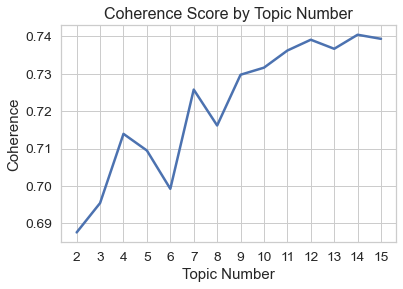

In [29]:
plt.plot(coherence_scores)
plt.xticks(range(0,len(Topics)),Topics)
plt.title('Coherence Score by Topic Number', fontsize=16)
plt.xlabel('Topic Number')
plt.ylabel('Coherence')

In [30]:
import numpy
lda_model = Trained_Models[numpy.argmax(coherence_scores)]
#Show top 10 words in each topic
lda_model.show_topics(num_words=10)

[(4,
  '0.191*"leader" + 0.191*"others" + 0.129*"choices" + 0.129*"song" + 0.129*"music" + 0.067*"connections" + 0.004*"conductor" + 0.004*"songs" + 0.004*"group" + 0.004*"choir"'),
 (11,
  '0.277*"group" + 0.277*"songs" + 0.097*"family" + 0.097*"friends" + 0.006*"others" + 0.006*"conductor" + 0.006*"choir" + 0.006*"community" + 0.006*"leaders" + 0.006*"singing"'),
 (13,
  '0.218*"meeting" + 0.147*"singing" + 0.076*"master" + 0.076*"camaraderie" + 0.076*"choir" + 0.076*"conductor" + 0.076*"joyful" + 0.076*"sense" + 0.005*"others" + 0.005*"songs"'),
 (12,
  '0.172*"dillon" + 0.089*"choir" + 0.089*"conductor" + 0.089*"others" + 0.089*"leader" + 0.089*"feel" + 0.089*"singing" + 0.089*"joyful" + 0.006*"songs" + 0.006*"group"'),
 (1,
  '0.204*"songs" + 0.137*"company" + 0.137*"friends" + 0.071*"session" + 0.071*"place" + 0.071*"learning" + 0.071*"range" + 0.071*"leaders" + 0.005*"others" + 0.005*"conductor"'),
 (2,
  '0.225*"others" + 0.115*"level" + 0.059*"sound" + 0.059*"session" + 0.059*

In [32]:
#4.5/ LDA Model
#Train LDA Model with 14 topics
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Tweak the two parameters below
number_topics = 14
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[ 0.07142857,  0.07142857,  0.07142857,  0.07142857,  3.07143024,
         0.07142857,  0.07142857, 12.07142774,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  1.07142875,  0.07142857,  0.07142857,
         0.07142857,  1.07142875,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  1.07142842,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142861,
         0.07142857,  0.07142857,  0.07142857],
       [ 0.07142857,  0.07142857,  0.07142857,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142863,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142857,  0.07142857,  2.07142893,
         0.07142871,  0.07142857,  0.07142865,  0.07142857,  0.07142857,
         0.07142857,  0.07142857,  0.07142875,  0.07142857,  0.07142857,
   

In [33]:
#Word Probablities by Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[0.00338983 0.00338983 0.00338983 0.00338983 0.14576278 0.00338983
  0.00338983 0.57288129 0.00338983 0.00338983 0.00338983 0.00338983
  0.05084746 0.00338983 0.00338983 0.00338983 0.05084746 0.00338983
  0.00338983 0.00338983 0.00338983 0.00338983 0.00338983 0.00338983
  0.00338983 0.00338983 0.00338983 0.00338983 0.00338983 0.00338983
  0.00338983 0.00338983 0.00338983 0.05084745 0.00338983 0.00338983
  0.00338983 0.00338983 0.00338983 0.00338983 0.00338983 0.00338983
  0.00338983]
 [0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444445 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.12888889 0.00444445 0.00444444 0.00444445
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444446 0.00444444
  0.00444444 0.00444444 0.00444444 0.00444444 0.00444444 0.00444444
  0.00444444 0.00444444 0.00444449 0.00444444 0.00444444 0.00444446
  0.00444444 0.00444444 0.00444444 0.68888883 0.00444444 0.00444444
  0.00444444]
 [0.00546448 0.00546

In [34]:
#Extract and view the top words in each topic
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
conductor : 0.573
choir : 0.146
family : 0.051
friendships : 0.051
sense : 0.051

Topic #1:
songs : 0.689
friends : 0.129
range : 0.004
sing : 0.004
learning : 0.004

Topic #2:
song : 0.235
music : 0.158
leader : 0.082
friendships : 0.082
company : 0.082

Topic #3:
group : 0.469
friendship : 0.270
level : 0.071
family : 0.005
songs : 0.005

Topic #4:
others : 0.161
place : 0.109
session : 0.109
chance : 0.109
connections : 0.109

Topic #5:
community : 0.336
singing : 0.204
feel : 0.137
music : 0.071
choir : 0.071

Topic #6:
dillon : 0.289
conductor : 0.218
choir : 0.147
level : 0.076
music : 0.076

Topic #7:
leaders : 0.281
songs : 0.281
family : 0.115
members : 0.059
friends : 0.059

Topic #8:
meeting : 0.254
harmonies : 0.172
sense : 0.172
sound : 0.089
others : 0.089

Topic #9:
others : 0.317
choir : 0.186
leader : 0.107
connection : 0.081
part : 0.054

Topic #10:
joyful : 0.257
choices : 0.257
leader : 0.133
song : 0.009
others : 0.009

Topic #11:
others : 0.023
leader :

In [35]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,camaraderie,cath,chance,choices,choir,community,company,conductor,conductors,connection,...,sense,session,sing,singers,singing,song,songs,sound,support,talent
0,0.003390,0.003390,0.003390,0.003390,0.145763,0.003390,0.003390,0.572881,0.003390,0.003390,...,0.050847,0.003390,0.003390,0.003390,0.003390,0.003390,0.003390,0.003390,0.003390,0.003390
1,0.004444,0.004444,0.004444,0.004444,0.004444,0.004444,0.004444,0.004444,0.004444,0.004444,...,0.004444,0.004444,0.004444,0.004444,0.004444,0.004444,0.688889,0.004444,0.004444,0.004444
2,0.005464,0.005464,0.005464,0.005464,0.005464,0.005464,0.081967,0.005464,0.005464,0.005464,...,0.005464,0.005464,0.005464,0.005464,0.005464,0.234973,0.005464,0.005464,0.005464,0.005464
3,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,...,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739,0.004739
4,0.003745,0.003745,0.108614,0.003745,0.003745,0.003745,0.056180,0.003745,0.056180,0.003745,...,0.003745,0.108614,0.003745,0.003745,0.003745,0.003745,0.003745,0.003745,0.056180,0.003745
5,0.004739,0.004739,0.004739,0.004739,0.071090,0.336493,0.004739,0.004739,0.004739,0.004739,...,0.004739,0.004739,0.004739,0.004739,0.203792,0.004739,0.004739,0.004739,0.004739,0.004739
6,0.005076,0.005076,0.005076,0.005076,0.147208,0.005076,0.005076,0.218274,0.005076,0.005076,...,0.005076,0.005076,0.005076,0.005076,0.005076,0.005076,0.005076,0.005076,0.005076,0.005076
7,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,...,0.003953,0.003953,0.003953,0.003953,0.003953,0.003953,0.280632,0.003953,0.003953,0.003953
8,0.005917,0.005917,0.005917,0.005917,0.005917,0.005917,0.005917,0.005917,0.005917,0.005917,...,0.171598,0.005917,0.005917,0.005917,0.005917,0.005917,0.005917,0.088757,0.005917,0.005917
9,0.028143,0.001876,0.001876,0.001876,0.185741,0.001876,0.001876,0.001876,0.001876,0.080675,...,0.001876,0.001876,0.001876,0.001876,0.001876,0.001876,0.001876,0.001876,0.001876,0.001876


In [36]:
!pip install wordcloud

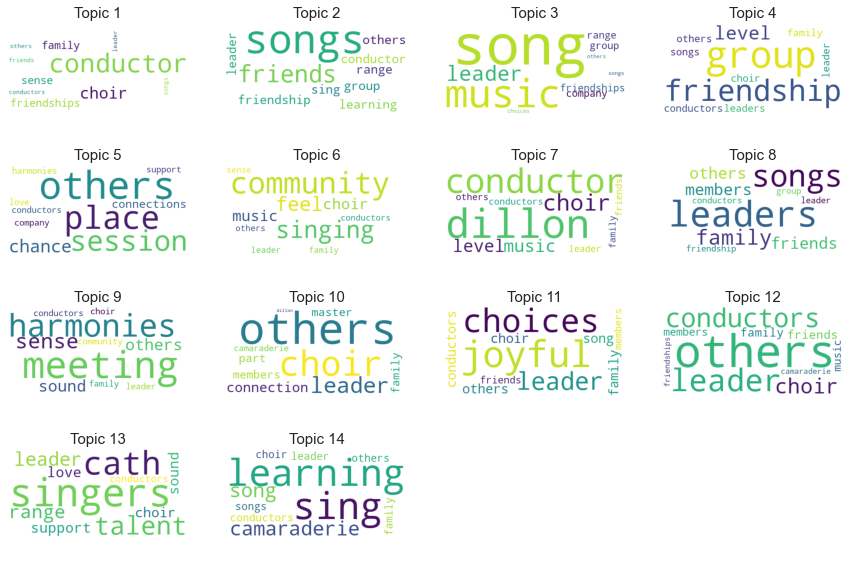

In [37]:
from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = plt.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
 count_dict = (zip(ReducedTerm, topic))
 count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
 # convert to dictionary type - keep top 10 words
 Word_Frequency = dict(count_dict[0:10])
 # generate word cloud
 wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
 # visualize word cloud in figure
 subfig_Row = math.floor(topic_idx/4)
 subfig_Col = math.ceil(topic_idx%4)
 ax[subfig_Row,subfig_Col].imshow(wordcloud)
 ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1)) 
plt.show() 